In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM


In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EA1C-322F

 Directory of C:\Users\Ujjwa\OneDrive\Desktop\ML Project\walmart

15-05-2022  17:45    <DIR>          .
14-05-2022  23:52    <DIR>          ..
14-05-2022  09:53    <DIR>          .ipynb_checkpoints
14-05-2022  12:55           495,598 anomaly-detection.ipynb
04-05-2022  21:03    <DIR>          Data
04-05-2022  21:01           161,700 features.csv.zip
11-05-2022  23:37             2,798 logs.log
14-05-2022  09:52           422,452 ML_Project.ipynb
12-05-2022  11:41            63,454 ML_project_DBSCAN.ipynb
04-05-2022  21:01           225,538 sampleSubmission.csv.zip
15-05-2022  17:45        10,538,849 Store_Dept_wise_DBSCAN.ipynb
14-05-2022  09:42    <DIR>          Store_Wise_Data
13-05-2022  10:54            55,741 Store_wise_DBSCAN.ipynb
14-05-2022  09:34           284,681 Store_wise_DBSCAN_better.ipynb
14-05-2022  11:39           231,024 Store_wise_SVM.ipynb
04-05-2022  21:01           240,940 test.csv.zip
04-05-2022  2

## Data Preparation

In [7]:
data = pd.read_csv("E:/python/ml project/tommywilczek-walmart/original/walmart.csv")
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,4,1,2010-02-05,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,423321,45,2013-06-28,False,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
423321,423322,45,2013-07-05,False,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
423322,423323,45,2013-07-12,False,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
423323,423324,45,2013-07-19,False,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [8]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.set_index("Date", inplace=True)
data

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,45,False,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
2013-07-05,45,False,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
2013-07-12,45,False,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221


In [9]:
# Replacing values A:3 ; B:2 ; C:1
data['Type'].replace(['A', 'B', 'C'], [3,2,1], inplace=True)

In [10]:
# Replacing values True = 1 and False = 0
data['IsHoliday'] = data['IsHoliday'].astype(int)

In [11]:
data = data[data["Weekly_Sales"].notna()]
data

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [12]:
data.isna().sum()

Store                0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [13]:
data.fillna(0, inplace=True)
data

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [14]:
data.isna().sum()

Store           0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## store wise division

In [15]:
# data.groupby("Store")

In [26]:
stores = np.unique(data["Store"])
datas = []
for store in stores:
    datas.append(data[data["Store"] == store])
# all data sorted by Stores in the list

In [27]:
# A random store
random_store = np.random.choice(stores) - 1
datas[random_store]

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,16,0,1.0,12786.85,19.79,2.580,0.00,0.00,0.0,0.00,0.00,189.381697,7.039,2,57197
2010-02-05,16,0,40.0,34870.18,19.79,2.580,0.00,0.00,0.0,0.00,0.00,189.381697,7.039,2,57197
2010-02-05,16,0,79.0,5965.04,19.79,2.580,0.00,0.00,0.0,0.00,0.00,189.381697,7.039,2,57197
2010-02-05,16,0,23.0,9481.49,19.79,2.580,0.00,0.00,0.0,0.00,0.00,189.381697,7.039,2,57197
2010-02-05,16,0,3.0,8278.26,19.79,2.580,0.00,0.00,0.0,0.00,0.00,189.381697,7.039,2,57197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,16,0,4.0,13124.69,40.99,3.686,2285.52,20.48,0.0,201.97,1237.41,199.219532,5.847,2,57197
2012-10-26,16,0,55.0,4637.35,40.99,3.686,2285.52,20.48,0.0,201.97,1237.41,199.219532,5.847,2,57197
2012-10-26,16,0,28.0,586.39,40.99,3.686,2285.52,20.48,0.0,201.97,1237.41,199.219532,5.847,2,57197


## SVM

In [28]:
k = 1
for df in datas:
    print(np.unique(df["Store"]))
    # df = df.set_index(["Store"])
    df.to_csv(f"Store_{k}.csv")
    k += 1

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]


In [30]:
k = 1
while k < 46:
    name = f"df_{k}" 
    st = pd.read_csv(f"Store_{k}.csv")
    globals()[name] = st
    k += 1

In [219]:
df_1

,Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2010-02-05,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,2010-02-05,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,2010-02-05,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,2010-02-05,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,2010-02-05,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,2012-10-26,1,0,13.0,38512.48,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,3,151315
10240,2012-10-26,1,0,93.0,66622.89,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,3,151315
10241,2012-10-26,1,0,48.0,3341.00,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,3,151315
10242,2012-10-26,1,0,95.0,117375.38,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,3,151315


In [22]:
datas[1]

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2010-02-05,0,1.0,35034.06,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
2010-02-05,0,26.0,13414.69,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
2010-02-05,0,90.0,106222.74,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
2010-02-05,0,58.0,28454.00,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
2010-02-05,0,28.0,1592.41,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,9.0,34790.00,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307
2012-10-26,0,34.0,16047.51,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307
2012-10-26,0,49.0,12565.94,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307


In [1]:
#ls

In [200]:
df_1.columns

Index(['Date', 'Store', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [204]:
store_1=df_1.drop(['Date','Store','Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Type','CPI','Unemployment','Fuel_Price','Dept','Temperature'],axis=1,inplace=False);store_1

,IsHoliday,Weekly_Sales
0,0,24924.50
1,0,11737.12
2,0,13223.76
3,0,37.44
4,0,1085.29
...,...,...
10239,0,38512.48
10240,0,66622.89
10241,0,3341.00
10242,0,117375.38


In [206]:
Y=store_1.values

In [207]:
svm1=OneClassSVM(nu=0.01, kernel="rbf", gamma='auto').fit(Y)

In [208]:
pred=svm1.predict(Y)

In [211]:
val=store_1[pred == -1]

In [212]:
val

,IsHoliday,Weekly_Sales
3,0,37.44
6,0,21249.31
7,0,32229.38
8,0,7659.97
11,0,16930.99
...,...,...
10230,0,5295.00
10234,0,9972.00
10235,0,22399.83
10238,0,8194.63


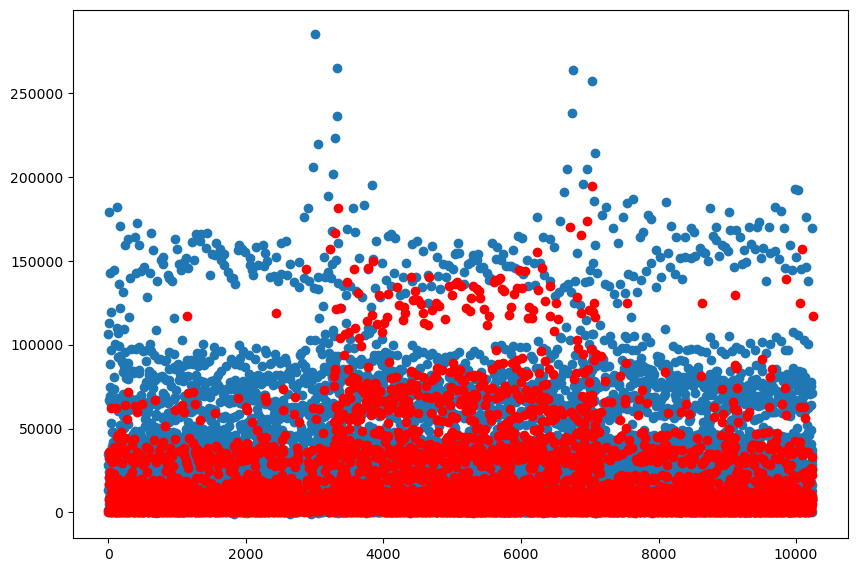

In [213]:
plt.figure(figsize = (10, 7), dpi = 100)
plt.scatter(store_2.index, store_2["Weekly_Sales"])
plt.scatter(val.index, val["Weekly_Sales"], color='r')
plt.show()